# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [49]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
boston = load_boston()   

In [4]:
data = boston.data

In [5]:
feature_names = boston.feature_names


In [6]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
price = boston.target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size = 0.2, random_state = 42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names) 

In [35]:
tsne = TSNE(n_components=2, learning_rate = 150, random_state = 100)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 1.78933086e+01, -3.11741848e+01],
       [-8.65648079e+00,  4.46151590e+00],
       [-1.32082157e+01,  1.81335506e+01],
       [ 2.92901974e+01, -2.86048908e+01],
       [-5.43946791e+00, -3.48920405e-01],
       [-1.18841133e+01,  8.12299347e+00],
       [-1.06387663e+01,  6.61568546e+00],
       [-1.56181440e+01,  2.57090378e+01],
       [ 2.86460609e+01, -2.97680206e+01],
       [ 2.62446003e+01, -2.79230385e+01],
       [-1.11998196e+01,  6.66320276e+00],
       [-3.97373319e+00,  7.83264637e+00],
       [ 1.26171065e-03,  9.95602894e+00],
       [ 2.72280502e+01, -2.75339851e+01],
       [-2.30920941e-01,  1.16089287e+01],
       [-6.74693108e+00, -3.01226401e+00],
       [-3.93049940e-02,  9.88989830e-01],
       [-1.41616144e+01,  1.89222584e+01],
       [-7.07257652e+00,  1.81482410e+01],
       [-1.09182081e+01,  1.90280380e+01],
       [ 2.39232960e+01, -3.13216457e+01],
       [-1.66520250e+00,  2.81756783e+00],
       [-1.27205763e+01,  9.60058403e+00],
       [-8.

In [36]:
X_train_tsne.shape

(404, 2)

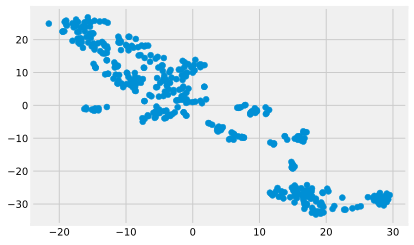

In [37]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

1    266
0    138
dtype: int64

Text(25, -7, 'Claster 1')

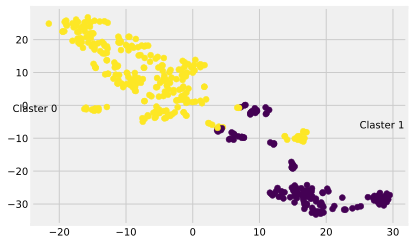

In [54]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c = labels_train)
plt.text(-27, -2, 'Claster 0')
plt.text(25, -7, 'Claster 1')

In [40]:
y_train.mean()

22.796534653465343

In [41]:
y_train[labels_train == 0].mean()

26.066541353383457

In [42]:
y_train[labels_train == 1].mean()

16.493478260869566

Text(0.5, 0, 'Cost')

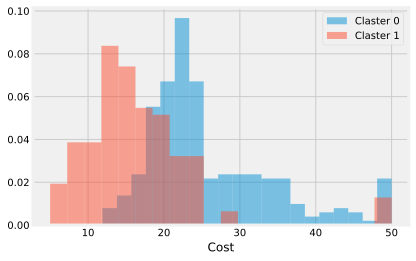

In [43]:
plt.hist(y_train[labels_train == 0], bins = 20, density = True, alpha =0.5)
plt.hist(y_train[labels_train == 1], bins = 20, density = True, alpha =0.5)
plt.legend(['Claster 0', 'Claster 1'])
plt.xlabel('Cost')

In [44]:
X_train.loc[labels_train ==0, 'RM'].mean()

6.493646616541352

In [45]:
X_train.loc[labels_train ==1, 'RM'].mean()

5.973260869565214

In [46]:
X_train.loc[labels_train ==0, 'CRIM'].mean()

0.2766786090225563

In [47]:
X_train.loc[labels_train ==1, 'CRIM'].mean()

10.03253507246377

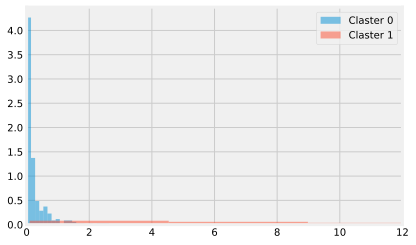

In [48]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins = 20, density = True, alpha =0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins = 20, density = True, alpha =0.5)
plt.xlim(0,12)
plt.legend(['Claster 0', 'Claster 1'])


# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter =100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

Text(25, -7, 'Claster 1')

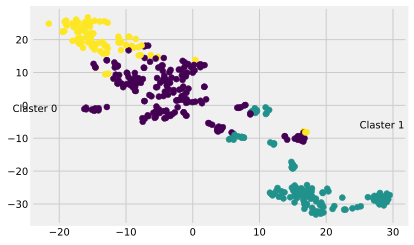

In [57]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c = labels_train)
plt.text(-27, -2, 'Claster 0')
plt.text(25, -7, 'Claster 1')

In [58]:
y_train[labels_train == 0].mean()

24.958115183246072

In [59]:
y_train[labels_train == 1].mean()

16.165354330708663

In [60]:
y_train[labels_train == 2].mean()

27.78837209302326

In [61]:
X_train.loc[labels_train ==0, 'CRIM'].mean()

0.42166020942408367

In [62]:
X_train.loc[labels_train ==1, 'CRIM'].mean()

10.797028425196853

In [63]:
X_train.loc[labels_train ==2, 'CRIM'].mean()

0.07356558139534886